<a href="https://colab.research.google.com/github/Theerachod/automated-screenshot-project/blob/main/dynamic_auto_screenshot_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Install and import necessary library
!pip install pandas
!pip install requests
!pip install pythainlp
!pip install pilmoji
!pip install emoji

import requests
import emoji
import math
import warnings
from PIL import Image, ImageDraw, ImageFont
from pilmoji import Pilmoji
from pilmoji.source import TwemojiEmojiSource
from pythainlp import word_tokenize
import pandas as pd
pd.set_option("display.max_columns", 50)

# Create function to download font
def download_file(url):
    local_filename = url.split("/")[-1]
    r = requests.get(url)
    with open(local_filename, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return

# Font url
sarabun_font_url = "https://github.com/Theerachod/Font/raw/main/Sarabun-Regular.ttf"
noto_font_url = "https://github.com/Theerachod/Font/raw/main/NotoColorEmoji-Regular.ttf"

# Download font
download_file(sarabun_font_url)
download_file(noto_font_url)

# Create function to list all existing emoji in message
def get_existing_emojis(message):
    emoji_list = []

    for char in message:
        if emoji.is_emoji(char):
            emoji_list.append(char)

    return emoji_list

In [20]:
# Create function to generate dynamic screenshot
def generate_dynamic_screenshot(message,width=3):
  # To hide warning message
  with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Set image width and background
        img_width = int(width*100)
        background_color = (255, 255, 255, 0)
        left_margin, right_margin = 10, 10

        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Calculate the message width
        each_word_width = []

        for word in result:
            if word in emoji_set:
                each_word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                each_word_width.append(thai_font.getsize(word)[0])

        # Calculate text height
        text_height = thai_font.getsize(dummy_message)[1] + 5

        # Calculate total width of message
        total_width = sum(each_word_width)

        # Calculate available space for each line
        available_space = img_width - left_margin - right_margin

        # Calculate how many line to plot
        num_line = math.ceil(total_width/available_space)

        # Space line
        space_line = num_line + 1

        # Calculate image height
        img_height = int((num_line*text_height) + (space_line*2.5))

        # Create image
        image = Image.new("RGB", (img_width, img_height), background_color)
        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)

        # Calculate space between line
        space = (img_height - text_height*num_line) / space_line

        # Initialize width counter
        width_counter = 0
        # Additional y
        added_y = (space+text_height)

        # Define x and y position
        x = left_margin
        y = space*2

        # Plot text on the image
        for word in result:
            if word in emoji_set:
                emo = True
                word_width = emoji_font.getsize(word)[0] + 2
            else:
                emo = False
                word_width =  thai_font.getsize(word)[0]

            width_counter += word_width

            if width_counter < available_space:
                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

            else:
                # Reset x postion
                x = left_margin
                # Add space for y position
                y += added_y
                # Reset width counter
                width_counter = 0
                # Add word width
                width_counter += word_width

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

  return image


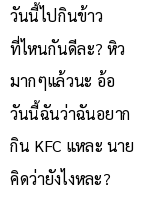

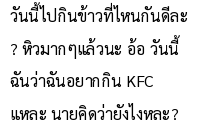

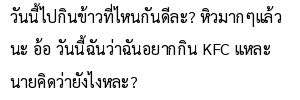

In [26]:
text = "วันนี้ไปกินข้าวที่ไหนกันดีละ? หิวมากๆแล้วนะ อ้อ วันนี้ฉันว่าฉันอยากกิน KFC แหละ นายคิดว่ายังไงหละ?"
display(generate_dynamic_screenshot(message=text,width=1.5))
print("\n")
display(generate_dynamic_screenshot(message=text,width=2))
print("\n")
display(generate_dynamic_screenshot(message=text,width=3))